In [12]:
import pandas as pd
import os


In [14]:
path = os.getcwd()

In [20]:
# VarianceThreshold
# simplest features selection is to
# remove features with very low variance
from sklearn.feature_selection import VarianceThreshold
data = pd.read_csv("../input/adult_folds.csv")
var_thresh = VarianceThreshold(threshold=0.1)
transformed_data = var_thresh.fit_transform(data)
# transform data will have all columns with variance less
# than 0.1

ValueError: could not convert string to float: 'Private'

In [22]:
# Remove features with a high correlation

import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing


# fetch a regression dataset
data = fetch_california_housing()
X = data["data"]
col_names = data["feature_names"]
y = data["target"]

# convert to pandas dataframe
df = pd.DataFrame(X, columns=col_names)
# introduce a highly correlated column
df.loc[:, "MedInc_Sqrt"] = df.MedInc.apply(np.sqrt)

# get correlation matrix (person)
df.corr()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedInc_Sqrt
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.984329
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,-0.132797
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.326688
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.066910
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,0.018415
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,0.015266
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.084303
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.015569
MedInc_Sqrt,0.984329,-0.132797,0.326688,-0.066910,0.018415,0.015266,-0.084303,-0.015569,1.000000


In [23]:
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectPercentile

class UnivariateFeatureSelction:
    def __init__(self, n_features, problem_type, scoring):
        """
        Custom univariate feature selection wrapper on 
        different univariate feature selection models from
        scikit-learn.
        :param n_features: SelectPercentile if float else SelectKBest
        :param problem_type: classification or regression
        :param scoring: scoring function, string
        """
        # for a given problem type, there are only
        # a few valid scoring methods
        # you can extend this with your own custom
        # methods if you wish
        if problem_type == "classification":
            valid_scoring = {
                "f_classif": f_classif,
                "chi2": chi2,
                "mutual_info_classif": mutual_info_classif
            }
        else:
            valid_scoring = {
                "f_regression": f_regression,
                "mutual_info_regression": mutual_info_regression
            }
        
        # raise exception if we do not have a valid scoring method
        if scoring not in valid_scoring:
            raise Exception("Invalid scoring function")
        
        # if n_features is int, we use selectkbest
        # if n_features is float, we use selectpercentile
        # please note that it is int in both cases in sklearn
        if isinstance(n_features, int):
            self.selection = SelectKBest(
                valid_scoring[scoring],
                k=n_features
            )
        elif isinstance(n_features, float):
            self.selection = SelectPercentile(
                valid_scoring[scoring],
                percentile=int(n_features * 100)
            )
        else:
            raise Exception("Invalid type of feature")
        
    # same fit function
    def fit(self, X, y):
        return self.selection.fit(X, y)
    
    # same transform function
    def transform(self, X):
        return self.selection.transform(X)
    
    # same fit_transform function
    def fit_transform(self, X, y):
        return self.selection.fit_transform(X, y)

ufs = UnivariateFeatureSelction(
    n_features=0.1,
    problem_type="regression",
    scoring="f_regression"
)
ufs.fit(X,y)
X_transformed = ufs.transform(X)

In [24]:
# Univariate feature selection may not always perform well
# NOTES: Its better to create less and important features than 
# to create hundreds of features in the first place.
# Most of the time people prefer doing feature selection using a
# Machine Learning Model
# Simplest form of feature selection that uses a model for selection is
# GREEDY FEATURE SELECTION
# # 1. Choose a model
# # 2. Select a loss/ scoring function
# # 3. Iterativerly evaluate each feature and add it to the list of
# #    "good" features if it improves loss/score.


[0.9577879999999999, 0.959072, 0.960176, 0.961204, 0.9617439999999999, 0.9622679999999999, 0.9629920000000001, 0.96364, 0.964156, 0.9644879999999999, 0.964808, 0.965244, 0.965636, 0.965992, 0.9663120000000001, 0.966544, 0.9668119999999999, 0.9670119999999999, 0.967376, 0.9677119999999999, 0.9681679999999999, 0.96834, 0.9684360000000001, 0.9686159999999999, 0.9687319999999999, 0.968892, 0.9691040000000001, 0.969252, 0.969392, 0.9695039999999999, 0.9697120000000001, 0.9699280000000001, 0.970008, 0.970288, 0.970524, 0.97058, 0.97062, 0.97076, 0.970996, 0.9711200000000001, 0.9713480000000001, 0.971492, 0.971584, 0.9716959999999999, 0.971852, 0.971932, 0.9721319999999999, 0.97214, 0.97214, 0.97214]
(1000, 50)


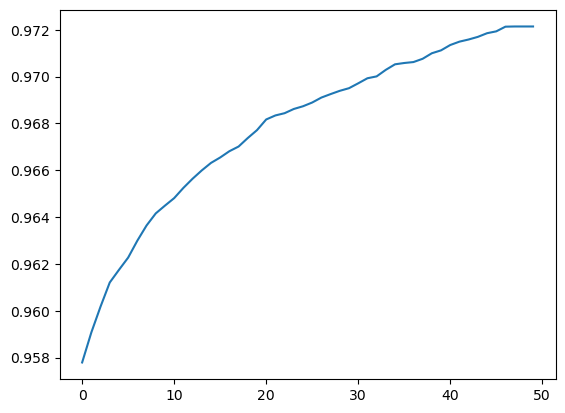

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import metrics
from sklearn.datasets import make_classification

class GreedyFeatureSelection:
    """
    A simple and custom class for greedy feature selection.
    You will need to modify it quite a bit to make it suitable
    for your dataset.
    """
    def evaluate_score(self, X, y):
        """
        This function evaluates model on data and returns
        Area Under ROC Curve (AUC)
        Note: We fit the data and calculate AUC on same data.
        WE ARE OVERFITTING HERE.
        But this is also a way to achieve greedy selection.
        k-fold will take k times longer.

        If you want to implement it in really correct way,
        calculate OOF AUC and return mean AUC over k folds.
        This requires only a few lines of change and has been
        show a few times in this book.
        
        :param X: training data
        :param y: targets
        :return: overfitted area under the roc curve
        """
        # fit the logistic regression model,
        # and calculate AUC on same data
        # again: BEWARE
        # you can choose any model that suits your data
        model = linear_model.LogisticRegression()
        model.fit(X, y)
        predictions = model.predict_proba(X)[:, 1]
        auc = metrics.roc_auc_score(y, predictions)
        return auc
    
    def _feature_selection(self, X, y):
        """
        This function does the actual greedy selection
        :param X: data, numpy array
        :param y: targets, numpy array
        :return: (best scores, best features)
        """
        # initialize good features list
        # and best scores to keep track of both
        good_features = []
        best_scores = []

        # calculate the number of features
        num_features = X.shape[1]

        # infinite loop
        while True:
            # initialize best feature and score of this loop
            this_feature = None
            best_score = 0

            # loop over all features
            for feature in range(num_features):
                # if feature is already in good features,
                # skip this for loop
                if feature in good_features:
                    continue
                # selected features are all good features till now
                # and current feature
                selected_features = good_features + [feature]
                # remove all other features from data
                xtrain = X[:, selected_features]
                # calculate the score, in our case, AUC
                score = self.evaluate_score(xtrain, y)
                # if score is greater than the best score 
                # of this loop, change best score and best features
                if score > best_score:
                    this_feature = feature
                    best_score = score
            
            # if we have selected a feature, add it
            # to the good feature list and update best scores list
            if this_feature != None:
                good_features.append(this_feature)
                best_scores.append(best_score)
            
            # if we didnt improve during the previous round,
            # exit the while loop
            if len(best_scores) > 2:
                if best_scores[-1] < best_scores[-2]:
                    break
        # return best scores and good features
        # why do we remove the last data point?
        return best_scores[:-1], good_features[:-1]

    def __call__(self, X, y):
        """
        Call function will call the class on a set of arguments
        """
        # select features, return scores and selected indices
        scores, features = self._feature_selection(X,y)
        # transform data with selected features
        return X[:, features], scores

if __name__=="__main__":
    # generate binary classification data
    X, y = make_classification(n_samples=1000, n_features=100)

    # transform data by greedy feature selection
    X_transformed, scores = GreedyFeatureSelection()(X,y)
    print(scores)
    print(X_transformed.shape)
    plt.plot(scores)
    plt.show()


In [26]:
# Another greedy approach is recursive feature elimination (RFE)
# Here we start with all features and keep removing the featurs in every
# iteration that provides the least value to a given model.
# RFE --> Opposite of greedy feature selection
# Please remember that when you use a model like
# Logistuc regression
# # Coefficient for features are more +ve if they are important for +ve Class
# # more -ve if they are important for -ve class.


In [27]:
# scikit-learn implementation for RFE
import pandas as pd

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing

# fetch a regression dataset
data = fetch_california_housing()
X = data["data"]
col_names = data["feature_names"]
y = data["target"]

# initialize the model
model = LinearRegression()
# initialize RFE
rfe = RFE(
    estimator = model,
    n_features_to_select=2
)

# fit RFE
rfe.fit(X, y)

# get the transformed data with
# selected columns
X_transformed = rfe.transform(X)

In [28]:
print(X.shape, X_transformed.shape)

(20640, 8) (20640, 2)


In [29]:
# feature coefficient or the importance of features
# if Coeffiecent > threshold: Keep it!! else DISCARD

import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.ensemble import RandomForestRegressor

# fetch a regression dataset
# in diabetes data we predict diabetes progression
# after one year based on some features
data = load_diabetes()
X = data["data"]
col_names = data["feature_names"]
y = data["target"]

# initialize the model
model = RandomForestRegressor()

# fit the model
model.fit(X, y)

RandomForestRegressor()

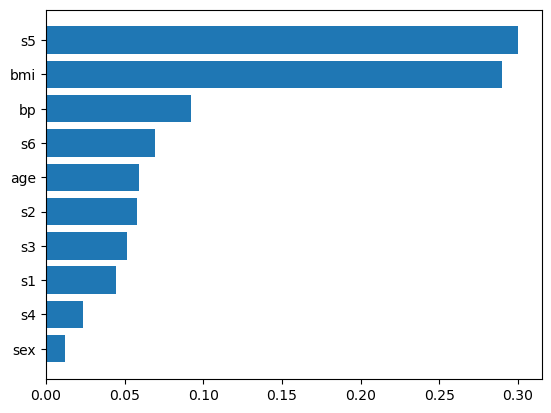

In [32]:
importances = model.feature_importances_
idxs = np.argsort(importances)
plt.barh(range(len(idxs)), importances[idxs], align='center')
plt.yticks(range(len(idxs)), [col_names[i] for i in idxs])
plt.show()


In [34]:
#  Scikit-learn also offers SelectFromModel class
# helps you to choose featues directly from a given model

import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

# fetch a regression dataset
# in diabetes data we predict diabetes progression
# after one yeature based on some features
data = load_diabetes()
X = data["data"]
col_names = data["feature_names"]
y = data["target"]

# initialize the model
model = RandomForestRegressor()

# select from the model
sfm = SelectFromModel(estimator=model)
X_transformed = sfm.fit_transform(X, y)

# see which features were selected
support = sfm.get_support()

# get feature names
print(
    [ x for x, y in zip(col_names, support) if y == True]
)


['bmi', 's5']


In [35]:
# One more thing that we are missing here is feature selection
# using model that have L1(Lasso) penelization
# # Most coeffienct will be 0, just select the non zero coefficients

# All tree-based model provides a feature importance
# # Can be used for XGBoost, LightGBM, or CatBoost

# IMP.NOT: Select features on train data and
# validate the model on validation data for 
# proper selection of features w/o overfitting the model

